# Medical Disease Diagnostic Project 
This project is a disease diagnostic for assisting medical doctor.
In this project, I used the training Heart Disease data set from the UCI Machine Learning Repository. The data was collected from several locations (Cleveland Clinic Foundation, Hungarian Institute of Cardiology, V.A. Medical Center, University Hospital Zurich).

We are going to use different classification model on the heart disease data from from the Cleveland Clinic (processed.cleveland.data) and select one with the best accuracy. The training data set used in this experiment consist of the following features


14 features used:
1. #3 (age) : age in years 
2. #4 (sex) : sex (1 = male; 0 = female) 
3. #9 (cp) : chest pain type
    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic 
4. #10 (trestbps) : resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol) : serum cholestoral in mg/dl 
6. #16 (fbs) : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg) : resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach) : maximum heart rate achieved 
9. #38 (exang) : exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak) : ST depression induced by exercise relative to rest 
11. #41 (slope) : the slope of the peak exercise ST segment
    -- Value 1: upsloping
    -- Value 2: flat
    -- Value 3: downsloping 
12. #44 (ca) : number of major vessels (0-3) colored by flourosopy 
13. #51 (thal) : 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (outcome) (the predicted attribute) : diagnosis of heart disease (angiographic disease status)
    -- Value 0: < 50% diameter narrowing
    -- Value 1: > 50% diameter narrowing 

These features are subset of the 76 attributes.
The raw data contains 76 attributes, but all published experiments prefer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import f1_score
from IPython.display import display
import matplotlib

# Pretty display for notebooks
%matplotlib inline
matplotlib.style.use('ggplot')

# Load the dataset
in_file = 'cleveland.data'
df = pd.read_csv(in_file)
full_data = pd.DataFrame(df)


In [2]:
#Let view our Data, to see what we have got
display(full_data.head())

# Display statistical information on the data
display(full_data[['age','sex','cp','trestbps','chol','fbs','restecg']].describe())
display(full_data[['thalach','exang','oldpeak','slope']].describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,outcome
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


,age,sex,cp,trestbps,chol,fbs,restecg
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000


,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000
mean,149.607261,0.326733,1.039604,1.600660
std,22.875003,0.469794,1.161075,0.616226
min,71.000000,0.000000,0.000000,1.000000
25%,133.500000,0.000000,0.000000,1.000000
50%,153.000000,0.000000,0.800000,2.000000
75%,166.000000,1.000000,1.600000,2.000000
max,202.000000,1.000000,6.200000,3.000000


In [3]:
full_data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
outcome       int64
dtype: object

# Data Preprocessing
Let reformat our data for modelling, training and testing.

In [4]:
# we need to convert thal and ca to float for processing
full_data['ca'] = pd.to_numeric(full_data['ca'], errors='coerce')
full_data['thal'] = pd.to_numeric(full_data['thal'], errors='coerce')

# Let comfirm that our data type has been change
full_data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
outcome       int64
dtype: object

In [5]:
# It is possible we have some NaN value, lets check that out
display(full_data[ full_data['ca'].isnull()].head(10))
display(full_data[ full_data['thal'].isnull()].head(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,outcome
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,outcome
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2


In [6]:
#We need to remove all the NaN, We can remove the rows completely or Fill in some value to the cells
full_data['ca'] = full_data['ca'].fillna(value = full_data['ca'].dropna().median())
full_data['thal']=full_data['thal'].fillna(value = full_data['thal'].dropna().median())
display(full_data[['age','sex','cp','trestbps','chol','fbs','restecg']].describe())
display(full_data[['thalach','exang','oldpeak','slope','ca','thal']].describe())

,age,sex,cp,trestbps,chol,fbs,restecg
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000


,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772
std,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383
min,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


# Data Visualization

In [7]:
data_copy = full_data.copy()
data_copy['outcome'] = np.where(data_copy['outcome'] >= 1, 1,0)

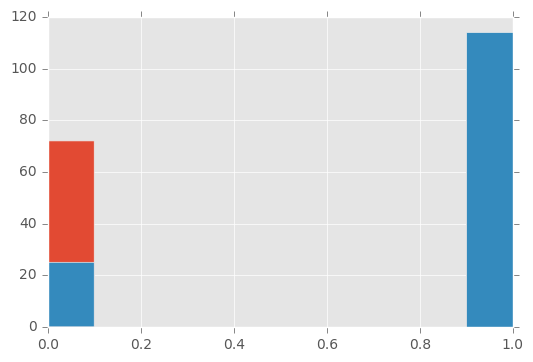

In [8]:
data_copy.groupby('outcome').sex.hist(alpha=0.7);

In [9]:
data_copy['sex'] = data_copy['sex'].map( {1: 'Male', 0: 'Female'} )

In [10]:
data_copy.groupby('outcome')['sex'].value_counts()

outcome  sex   
0        Male       92
         Female     72
1        Male      114
         Female     25
Name: sex, dtype: int64

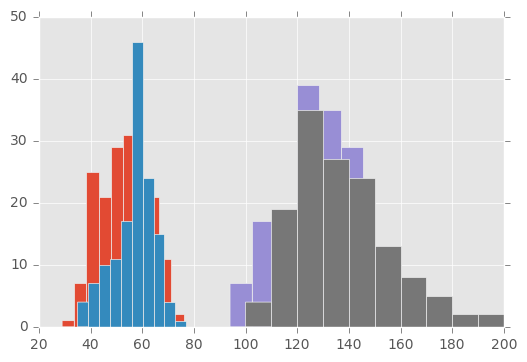

In [11]:
data_copy.groupby('outcome').age.hist(alpha=0.6);
data_copy.groupby('outcome').trestbps.hist(alpha=0.6);

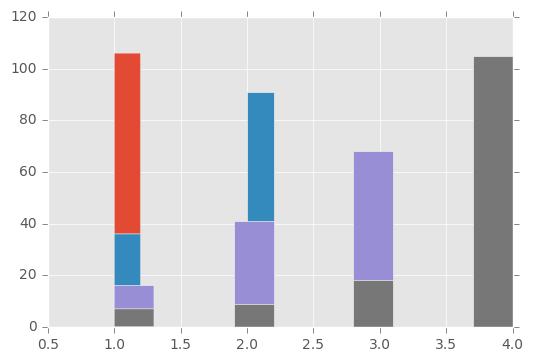

In [12]:
data_copy.groupby('outcome').slope.hist(alpha=0.6);
data_copy.groupby('outcome').cp.hist(alpha=0.6);

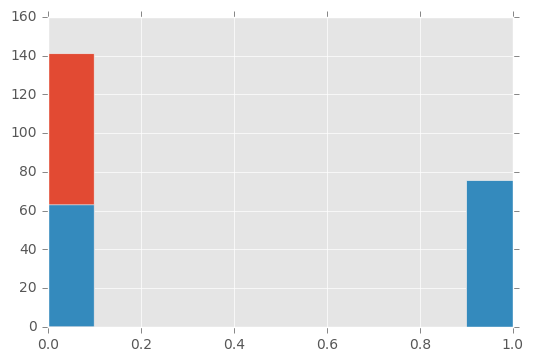

In [13]:
data_copy.groupby('outcome').exang.hist(alpha=0.6);

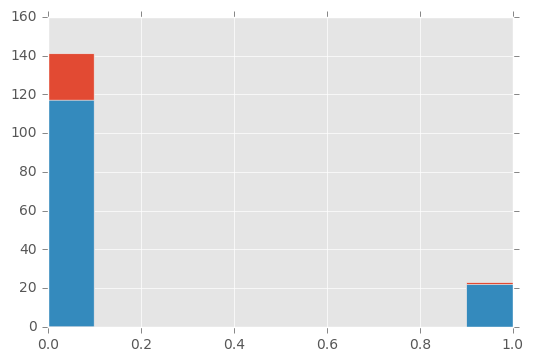

In [14]:
data_copy.groupby('outcome').fbs.hist(alpha=0.6);

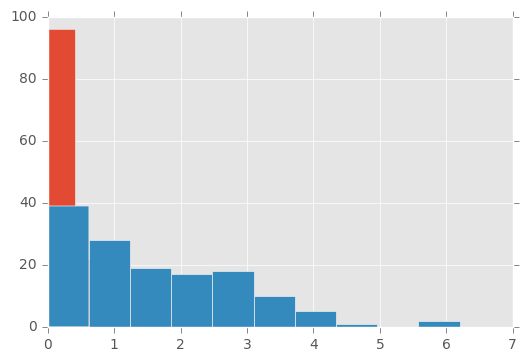

In [15]:
data_copy.groupby('outcome').oldpeak.hist(alpha=0.8);

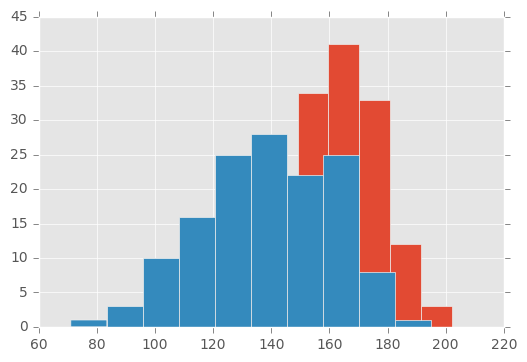

In [16]:
data_copy.groupby('outcome').thalach.hist(alpha=0.7);

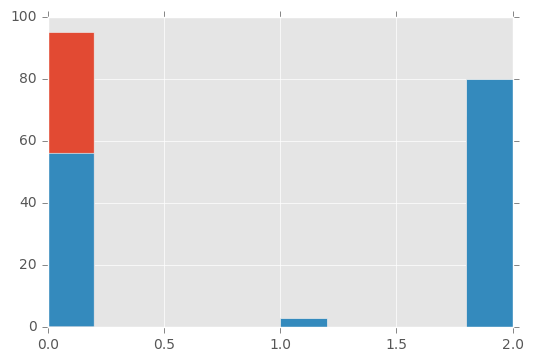

In [17]:
data_copy.groupby('outcome').restecg.hist(alpha=0.7);

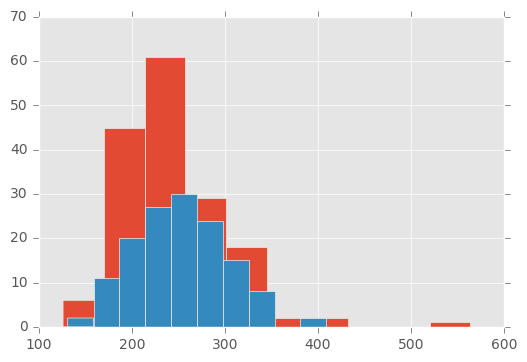

In [18]:
data_copy.groupby('outcome').chol.hist(alpha=0.7);

In [19]:
# Store the 'outcome' feature in a new variable and remove it from the dataset
outcomes = full_data['outcome']
# Drop predicted value from data
data = full_data.drop('outcome', axis = 1)

In [20]:
# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(data, outcomes,  test_size=0.25,stratify=outcomes, random_state=42)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 227 samples.
Testing set has 76 samples.


# Model Selection
Train different Classifiers and Measure there performance

In [21]:
from sklearn.metrics import precision_score
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target,multi=True):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, average='micro') if multi else f1_score(target.values, y_pred)


def train_predict(clf, X_train, y_train, X_test, y_test, multi=True):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train,multi=multi)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test,multi=multi)))
    print ("Precision score for test set: {:.4f}.".format(precision_score(y_test, clf.predict(X_test), average='macro')))

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Set up the list of the classifiers to use
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1,random_state=42)
lr = LogisticRegression(random_state=42)
gnb = GaussianNB()
ada = AdaBoostClassifier(random_state=42)
etc = ExtraTreesClassifier(n_estimators=30,random_state=42)
eclf = VotingClassifier(estimators=[('GNB', gnb), ('ADA', ada),('ETC', etc)], voting='soft',weights = [2,1,2])
knn = KNeighborsClassifier(3)
svc1 = SVC(kernel="linear", C=0.025,random_state=42)
svc2 = SVC(gamma=2, C=1,random_state=42)
gpc = GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)
decisionTree = DecisionTreeClassifier(max_depth=5,random_state=42)
bagging = BaggingClassifier(random_state=42)
sgd = SGDClassifier(loss="hinge", penalty="l2",random_state=42)
qda = QuadraticDiscriminantAnalysis()
classifiers = [ knn, svc1, svc2, gpc, decisionTree, rf, ada, gnb, qda, lr, etc, bagging, sgd, eclf]


In [23]:

for clf in classifiers:
    train_predict(clf,X_train,y_train, X_test, y_test)


Training a KNeighborsClassifier using a training set size of 227. . .
Trained model in 0.0500 seconds
Made predictions in 0.0160 seconds.
F1 score for training set: 0.6784.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.5000.


C:\Users\Engr Kola\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision score for test set: 0.1543.
Training a SVC using a training set size of 227. . .
Trained model in 0.1120 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.6520.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.5789.
Precision score for test set: 0.2707.
Training a SVC using a training set size of 227. . .
Trained model in 0.0090 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.5395.
Precision score for test set: 0.1079.
Training a GaussianProcessClassifier using a training set size of 227. . .
Trained model in 2.0620 seconds
Made predictions in 0.0480 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0230 seconds.
F1 score for test set: 0.0658.
Precision score for test set: 0.2085.
Training a DecisionTreeClassifier using a training set size of 227. . .
Trained model in 0.0450 seconds
Made predictions in 0.0000 seconds.
F1 score for trai

C:\Users\Engr Kola\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:694: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Trained model in 0.3880 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8590.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.5395.
Precision score for test set: 0.2700.
Training a LogisticRegression using a training set size of 227. . .
Trained model in 0.1020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.6520.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.6184.
Precision score for test set: 0.3667.
Training a ExtraTreesClassifier using a training set size of 227. . .
Trained model in 0.1150 seconds
Made predictions in 0.0240 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0240 seconds.
F1 score for test set: 0.5395.
Precision score for test set: 0.2151.
Training a BaggingClassifier using a training set size of 227. . .
Trained model in 0.0610 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.9824.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.5263.
P

# Data Reshape
Let's try binary classification for better performarce
The state space is high for us to get accurate results using multi-classification approach


In [24]:
full_data['outcome'] = np.where(outcomes >= 1, 1,0)
outcomes = full_data['outcome']
data = full_data.drop('outcome', axis = 1)

In [25]:
# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(data, outcomes,  test_size=0.25,stratify=outcomes, random_state=42)

In [26]:
for clf in classifiers:
    train_predict(clf,X_train,y_train, X_test, y_test, multi=False)

Training a KNeighborsClassifier using a training set size of 227. . .
Trained model in 0.0010 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.7308.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.6250.
Precision score for test set: 0.6853.
Training a SVC using a training set size of 227. . .
Trained model in 0.0100 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8100.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.8116.
Precision score for test set: 0.8284.
Training a SVC using a training set size of 227. . .
Trained model in 0.0060 seconds
Made predictions in 0.0040 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.0000.
Precision score for test set: 0.2697.
Training a GaussianProcessClassifier using a training set size of 227. . .


C:\Users\Engr Kola\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Trained model in 0.2380 seconds
Made predictions in 0.0050 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.5937.
Precision score for test set: 0.6574.
Training a DecisionTreeClassifier using a training set size of 227. . .
Trained model in 0.0010 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9246.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.6944.
Precision score for test set: 0.7096.
Training a RandomForestClassifier using a training set size of 227. . .
Trained model in 0.0680 seconds
Made predictions in 0.0150 seconds.
F1 score for training set: 0.8792.
Made predictions in 0.0180 seconds.
F1 score for test set: 0.8219.
Precision score for test set: 0.8289.
Training a AdaBoostClassifier using a training set size of 227. . .
Trained model in 0.1860 seconds
Made predictions in 0.0070 seconds.
F1 score for training set: 0.9135.
Made predictions in 0.0050 seconds.
F1 score for test set: 0.

Now, we have a very good result 91.89 ~ 92% accuracy on an unseen data.
Also 0.9761 ~ 98% on the training data

# Cross Validation
Let us try cross validation to see how our Models perform

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, random_state=42)

for clf in classifiers:
    scores = cross_val_score(clf, data, outcomes, cv=cv)
    a = np.mean(scores)
    print ('mean score of {} is {}'.format(clf.__class__.__name__,a))

mean score of KNeighborsClassifier is 0.624026696329
mean score of SVC is 0.827927326659
mean score of SVC is 0.541193919169
mean score of GaussianProcessClassifier is 0.574312198739
mean score of DecisionTreeClassifier is 0.771345939933
mean score of RandomForestClassifier is 0.807912495365
mean score of AdaBoostClassifier is 0.797360029663
mean score of GaussianNB is 0.841153133111
mean score of QuadraticDiscriminantAnalysis is 0.828034853541
mean score of LogisticRegression is 0.827704857249
mean score of ExtraTreesClassifier is 0.827374860957
mean score of BaggingClassifier is 0.800808305525
mean score of SGDClassifier is 0.567545420838
mean score of VotingClassifier is 0.854271412681


In [28]:
train_predict(clf,X_train,y_train, X_test, y_test, multi=False)
from sklearn.externals import joblib
joblib.dump(eclf, 'VotingClassifier.pkl')

Training a VotingClassifier using a training set size of 227. . .
Trained model in 0.2720 seconds
Made predictions in 0.0290 seconds.
F1 score for training set: 0.9761.
Made predictions in 0.0310 seconds.
F1 score for test set: 0.9189.
Precision score for test set: 0.9224.


['VotingClassifier.pkl']

# Conclusion
14 predictor features from the UCI heart disease dataset are used to predict the diagnosis of heart disease (angiographic disease status). The performances of 14 different machine learning algorithms are compared .

25% of the data is hold out as a testing data set that is not seen during the training stage of the data. During the training of boosted trees and support vector machines, 10-fold cross-validation is used to maximize the ROC (parameter tuning) and select the final models.

After the comparison, the accuracy of the model predictions shows that VotingClassifier performs best (accuracy of 0.92 on testing data and 0.98 on training data), it is our choice of algorithm for the Diagnotic interface.

The short analysis shows the predictive capability of machine learning algorithms for heart diseases. Possible improvements can be obtained with improved data pre-processing (outliers, variances), choice of models, parameter selection, model tuning and so on.